In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import altair as alt

In [2]:
# Reading files
prices = pd.read_csv('./data/djia_prices2.csv')
scores = pd.read_csv('./data/djia_sustainability_scores.csv')
ticker =  pd.read_csv('./data/ticker.csv')

In [3]:
# Cleaning data
df_ticker = ticker.drop(['Last Price'
                            ,'Change'
                            , '% Change'
                            , 'Volume'], axis=1)

df_ticker = df_ticker.rename(columns = {'ticker_code': 'Ticker Code'}
                             , inplace = False)
df_ticker.head(3)

,Ticker Code,Company Name
0,NKE,"NIKE, Inc."
1,DIS,The Walt Disney Company
2,AMGN,Amgen Inc.


In [4]:
# Renaming and removing unecessary columns
df_prices = prices.rename(columns = {'Row': 'Date'
                                     ,'Column': 'Ticker Code'
                                     , 'Value': 'AdjClose'}
                             , inplace = False)

df_prices = df_prices.drop(['Page1'], axis=1)

# Changing date format
df_prices['Date'] = pd.to_datetime(df_prices['Date'])
df_prices.sort_values(by = 'AdjClose', ascending = True)
df_prices['Date'] = df_prices['Date'].dt.strftime('%b-%Y')

df_prices.head(3)

,Date,Ticker Code,AdjClose
0,Jan-2019,AAPL,40.713184
1,Jan-2019,AMGN,177.903961
2,Jan-2019,AXP,99.855850


In [5]:
# Aug 2019
aug_2019 = df_prices.groupby(['Date','Ticker Code'])['AdjClose'].sum()
aug_2019 = pd.DataFrame(aug_2019.reset_index(name = 'AdjClose'))
aug_2019 = aug_2019.loc[aug_2019['Date'].isin(['Aug-2019'])]
aug_2019 = aug_2019 .sort_values(by = 'AdjClose', ascending = False).reset_index(drop=True)

# Aug 2020
aug_2020 = df_prices.groupby(['Date','Ticker Code'])['AdjClose'].sum()
aug_2020 = pd.DataFrame(aug_2020.reset_index(name = 'AdjClose'))
aug_2020 = aug_2020.loc[aug_2020['Date'].isin(['Aug-2020'])]
aug_2020 = aug_2020 .sort_values(by = 'AdjClose', ascending = False).reset_index(drop=True)

# Concatenate all
df_all = pd.concat([aug_2019, aug_2020])
df_all = df_all.sort_values(by = 'AdjClose', ascending = False).reset_index(drop=True)

df_all.head()

,Date,Ticker Code,AdjClose
0,Aug-2019,BA,357.605164
1,Aug-2020,HD,283.544739
2,Aug-2020,AMGN,251.634445
3,Aug-2020,MSFT,224.986130
4,Aug-2019,HD,221.098007


In [6]:
# Aug 2019-2020 valuation
prices2 = pd.read_csv('./data/djia_prices3.csv')
prices2.head(3)

,Ticker Code,Aug 2019,Aug 2020,Aug 19-20 valuation
0,AAPL,51.476730,128.807754,1.50
1,AMGN,201.610306,251.634445,0.25
2,AXP,118.300324,101.589996,-0.14


In [7]:
# Removing unecessary columns
df_scores = scores.drop(['palmOil', 'controversialWeapons', 'gambling',
       'socialScore', 'nuclear', 'furLeather', 'alcoholic', 'gmo', 'catholic',
       'socialPercentile', 'governanceScore', 'environmentPercentile', 'animalTesting', 'tobacco',
       'highestControversy', 'esgPerformance', 'coal', 'pesticides', 'adult', 'percentile', 'smallArms',
       'governancePercentile', 'peerCount', 'environmentScore', 'militaryContract'], axis =1)

# Changing column names
df_scores = df_scores.rename(columns = {'company_ticker': 'Ticker Code'
                                        ,'totalEsg': 'Total ESG'
                                        , 'peerGroup': 'Industry'}
                             , inplace = False)

# Adding score lables
df_scores.loc[(df_scores['Total ESG'] <=15, 'Score')] = 'Low'
df_scores.loc[(df_scores['Total ESG'] >15) & (df_scores['Total ESG'] <=30), 'Score'] = 'Medium'
df_scores.loc[(df_scores['Total ESG'] >30) & (df_scores['Total ESG'] <=40), 'Score'] = 'High'

df_scores.head(3)

,Total ESG,Industry,Ticker Code,Score
0,24.24,Food Products,KO,Medium
1,16.09,Textiles & Apparel,NKE,Medium
2,16.28,Media,DIS,Medium


In [8]:
# Joining data sets df_scores + df_ticker
df_merged = df_ticker.merge(df_scores, on='Ticker Code', how = 'left')
df_merged.dropna()
df_merged.head(3)

,Ticker Code,Company Name,Total ESG,Industry,Score
0,NKE,"NIKE, Inc.",16.09,Textiles & Apparel,Medium
1,DIS,The Walt Disney Company,16.28,Media,Medium
2,AMGN,Amgen Inc.,20.43,Pharmaceuticals,Medium


### Plotting with Matplotlib and Seaborn

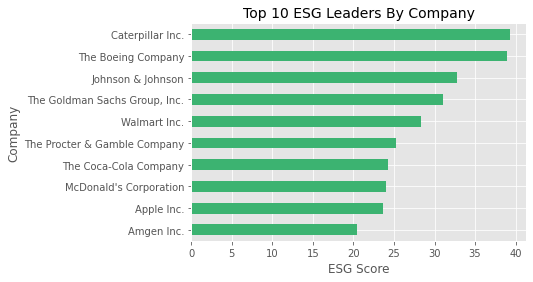

In [9]:
# Bar chart 1
# Top ESG leaders by company
plt.style.use('ggplot')
by_company = df_merged.groupby('Company Name')['Total ESG'].mean()
ax = by_company.nlargest(10).sort_values(ascending = True).plot.barh(color='mediumseagreen')
plt.title('Top 10 ESG Leaders By Company',fontsize=14)
plt.xlabel('ESG Score')
plt.ylabel('Company')
plt.show()

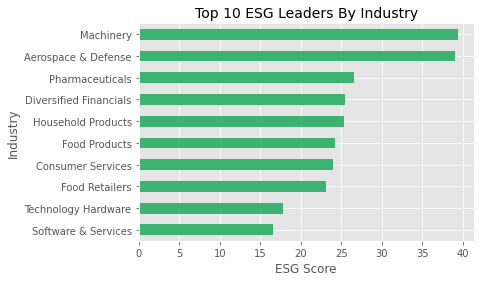

In [10]:
# Bar chart 2
# Top ESG leaders by industry
by_industry = df_merged.groupby('Industry')['Total ESG'].mean()
ax = by_industry.nlargest(10).sort_values(ascending = True).plot.barh(color='mediumseagreen')
plt.title('Top 10 ESG Leaders By Industry',fontsize=14)
plt.xlabel('ESG Score')
plt.ylabel('Industry')
plt.show()

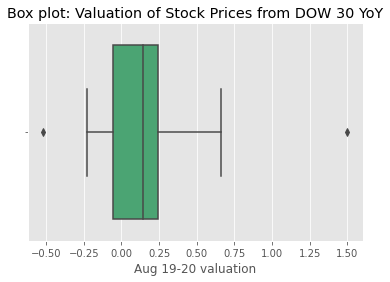

In [11]:
# Box plot
ax = sns.boxplot(x=prices2['Aug 19-20 valuation'], hue = prices2['Ticker Code']
                 , color='mediumseagreen').set_title('Box plot: Valuation of Stock Prices from DOW 30 YoY')
plt.show()

In [12]:
# Understanding box plot
print(prices2['Aug 19-20 valuation'].mean())
print(prices2['Aug 19-20 valuation'].max()) # Outlier: Apple
print(prices2['Aug 19-20 valuation'].min()) # Outlier: The Boeing Company 
print(prices2['Aug 19-20 valuation'].quantile(0.25))
print(prices2['Aug 19-20 valuation'].quantile(0.50))
print(prices2['Aug 19-20 valuation'].quantile(0.75))

0.15550000000000003
1.5
-0.52
-0.05500000000000001
0.14
0.2425


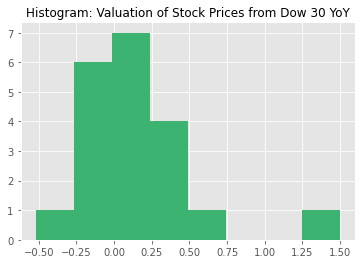

In [13]:
# Histogram
df_hist = prices2.drop(['Ticker Code', 'Aug 2019', 'Aug 2020'], axis=1)
ax = df_hist.hist(bins =8, color = 'mediumseagreen')
plt.title('Histogram: Valuation of Stock Prices from Dow 30 YoY',fontsize=12)
plt.show()

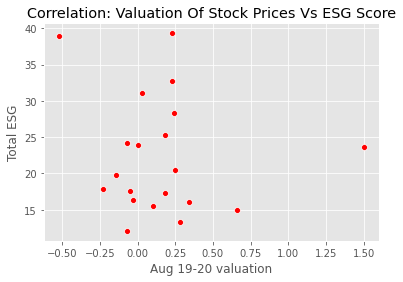

In [14]:
# Scatter plot with seaborn
df_merged2 = df_merged.merge(prices2, on='Ticker Code', how = 'left')
df_merged2.dropna()
ax = sns.scatterplot(data=df_merged2, x='Aug 19-20 valuation', y='Total ESG'
                , color='red').set_title('Correlation: Valuation Of Stock Prices Vs ESG Score')
plt.show()
fig = ax.get_figure()

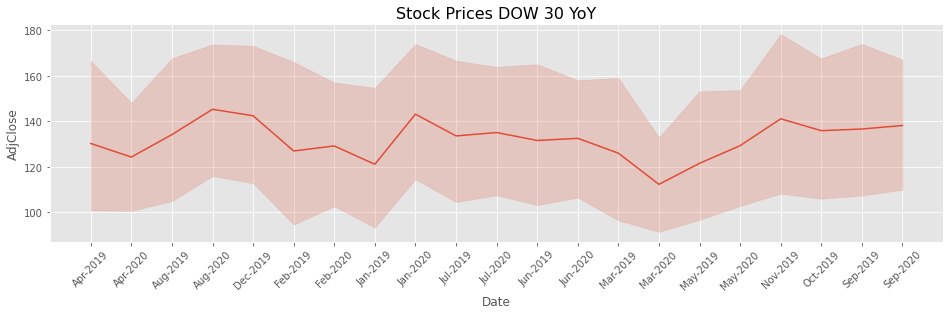

In [15]:
# Line chart with seaborn >>> Date is not ordered I don't know why!
df = df_prices.sort_values(by = 'Date', ascending = True)
plt.figure(figsize=(16,4))
ax = sns.lineplot(data=df, x="Date", y="AdjClose")
ax.set_title('Stock Prices DOW 30 YoY', size = 16)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

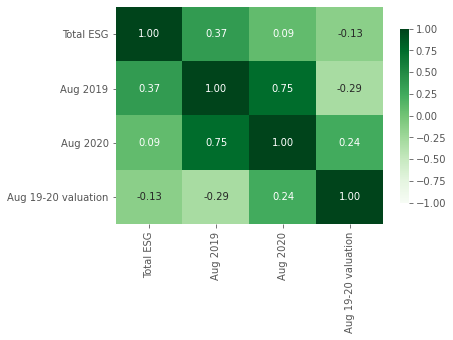

In [16]:
# Data correlation with seaborn heatmap
corr = df_merged2.corr()
ax = sns.heatmap(corr, annot=True, fmt=".2f", cmap="Greens",
                vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.setp(ax.get_xticklabels(), rotation=90)
plt.yticks(rotation=0)
plt.show()

### Plotting with Altair

In [17]:
# Preparing data to plot
df = df_merged.dropna()
df = df.sort_values(by = 'Total ESG', ascending = False)

df2 = df[:11]
df2

,Ticker Code,Company Name,Total ESG,Industry,Score
27,CAT,Caterpillar Inc.,39.33,Machinery,High
28,BA,The Boeing Company,38.98,Aerospace & Defense,High
6,JNJ,Johnson & Johnson,32.78,Pharmaceuticals,High
30,GS,"The Goldman Sachs Group, Inc.",31.06,Diversified Financials,High
12,WMT,Walmart Inc.,28.39,Food Retailers,Medium
8,PG,The Procter & Gamble Company,25.28,Household Products,Medium
23,KO,The Coca-Cola Company,24.24,Food Products,Medium
24,KO,The Coca-Cola Company,24.24,Food Products,Medium
20,MCD,McDonald's Corporation,23.97,Consumer Services,Medium
29,AAPL,Apple Inc.,23.62,Technology Hardware,Medium


In [18]:
# Horizontal bar chat with altair
bars = alt.Chart(df2,title = 'Top 10 ESG Leaders By Company').mark_bar(stroke='transparent', color='#6bc297').encode(
    y= alt.Y('Company Name:N', title = None, sort='-x'),
    x= alt.X('mean(Total ESG):Q', title ='ESG Score'),

).properties(
    width=600,
    height=300
)
text=alt.Chart(df2).mark_text(dx=1, dy=2, align='left', baseline='middle').encode(
    y=alt.Y('Company Name:N', title = None, sort='-x'),
    x='mean(Total ESG):Q',
    text='mean(Total ESG):Q'
)
alt.layer(bars, text)

alt.LayerChart(...)

In [19]:
# Histogram with altair
source = df_hist

alt.Chart(df_hist, title = 'Histogram: Valuation of Stock Prices from Dow 30 YoY').mark_bar().encode(
    alt.X("Aug 19-20 valuation:Q", bin=alt.BinParams(maxbins=8)),
    y='count(*):Q',

).configure_mark(
    opacity=1,
    color='#6bc297'
    
).properties(
    width=300,
    height=130
)

alt.Chart(...)

In [20]:
# Box plot with altair

source = prices2

alt.Chart(source, title= 'Box plot: Valuation of Stock Prices from DOW 30 YoY').mark_boxplot(size=100).encode(
    x='Aug 19-20 valuation:Q',
).configure_mark(
    opacity=1,
    color='#6bc297',

).properties(
    width=300,
    height=150
)

alt.Chart(...)

In [21]:
# Scatter plot with altair

alt.Chart(df_merged2, title = 'Correlation: Valuation Of Stock Prices Vs ESG Score').mark_point().encode(
    x='Aug 19-20 valuation:Q',
    y='Total ESG:Q'
).configure_mark(
    opacity=1,
    color='red'
).properties(
    width=400,
    height=300
)

alt.Chart(...)